In [2]:
import pandas as pd
import json
from pandas import json_normalize
import zipfile
import os

Source - https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [3]:
import json
  
# Opening JSON file
data = open('/Users/tusharmishra/Downloads/json-2.json')
  
# returns JSON object as 
# a dictionary
dict = json.load(data)

In [4]:
df = json_normalize(dict['data']) 



In [5]:
print(df)

   edit_history_tweet_ids                   id  \
0   [1610516629862993921]  1610516629862993921   
1   [1610516627719847936]  1610516627719847936   
2   [1610516625299570688]  1610516625299570688   
3   [1610516621239504896]  1610516621239504896   
4   [1610516615396745216]  1610516615396745216   
..                    ...                  ...   
94  [1610516051468369920]  1610516051468369920   
95  [1610516051091165186]  1610516051091165186   
96  [1610516050277277698]  1610516050277277698   
97  [1610516043918893056]  1610516043918893056   
98  [1610516041498791936]  1610516041498791936   

                                                 text  
0   @ukgimp Client cash accounting (rents) - very ...  
1   @stout_christina @drunkensomm Like the heated ...  
2   RT @backtolife_2023: WEF Declares People Have ...  
3   @SinisterBadger Hard to say, for me personally...  
4   RT @poormanscaviar: I do believe prices have h...  
..                                                ...  
94  RT 

In [5]:
df.to_csv('Tweet_cars.csv')

In [6]:
# Load the regular expression library
import re

# Remove punctuation
df['paper_text_processed'] = \
df['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['paper_text_processed'] = \
df['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df['paper_text_processed'].head()

0    @ukgimp client cash accounting (rents) - very ...
1    @stout_christina @drunkensomm like the heated ...
2    rt @backtolife_2023: wef declares people have ...
3    @sinisterbadger hard to say for me personally ...
4    rt @poormanscaviar: i do believe prices have h...
Name: paper_text_processed, dtype: object

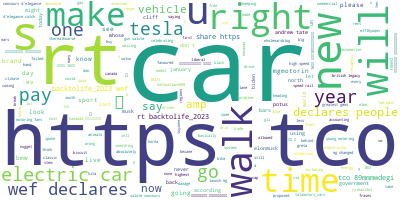

In [7]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [8]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = df.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

/Users/tusharmishra/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['ukgimp', 'client', 'cash', 'accounting', 'rents', 'different', 'gaap', 'profit', 'loss', 'accounting', 'robbing', 'peter', 'pay', 'paul', 'bill', 'using', 'clients', 'money', 'pay', 'holidays', 'tarts', 'cars', 'drugs', 'booze', 'rent', 'wages']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tusharmishra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


In [10]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/Users/tusharmishra/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/tusharmishra/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/tusharmishra/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[(0,
  '0.053*"cars" + 0.030*"tco" + 0.030*"https" + 0.018*"rt" + 0.010*"electric" '
  '+ 0.009*"make" + 0.008*"us" + 0.007*"min" + 0.007*"since" + 0.007*"mo"'),
 (1,
  '0.022*"cars" + 0.020*"tco" + 0.020*"https" + 0.014*"new" + 0.011*"like" + '
  '0.011*"car" + 0.011*"say" + 0.006*"amp" + 0.006*"toyzone" + 0.006*"easy"'),
 (2,
  '0.030*"rt" + 0.014*"car" + 0.013*"see" + 0.013*"bmw" + 0.013*"like" + '
  '0.013*"electric" + 0.008*"make" + 0.007*"climate" + 0.007*"cars" + '
  '0.007*"bike"'),
 (3,
  '0.019*"cars" + 0.017*"https" + 0.017*"tco" + 0.016*"rt" + 0.009*"elonmusk" '
  '+ 0.009*"kita" + 0.009*"dan" + 0.008*"tesla" + 0.007*"amp" + '
  '0.006*"driven"'),
 (4,
  '0.046*"cars" + 0.033*"rt" + 0.032*"https" + 0.032*"tco" + 0.018*"right" + '
  '0.018*"people" + 0.018*"wef" + 0.018*"walk" + 0.018*"declares" + '
  '0.018*"share"'),
 (5,
  '0.031*"rt" + 0.017*"https" + 0.017*"tco" + 0.012*"volvo" + 0.012*"vw" + '
  '0.009*"cars" + 0.006*"車か日本製てす" + 0.006*"falling" + 0.006*"arabası" + '
  

In [12]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 2.6 MB/s eta 0:00:0000:0100:01
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=a207f1ddfb9621f4205eeab8e70a71882ee77eef1d4f16baf301ee3d13e96f11
  Stored in directory: /Users/tusharmishra/Library/Caches/pip/wheels/1f/ef/46/1dc1c1e5d8ff2f3b44cccaf004cf64488cf82b5c359fbc8efb
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=1831c451511d4cfc3af9fe452abe287aa703efc92618debf03ea6ce287a7302d
  Stored in directory: /Users/tusharmishra/Library/Caches/pip/wheels/03/8b/6f/9f13c705de81a6b351b718b3cf917e41ad7c0933c8630d4dd4
Successfully built pyLDAvis skl

In [13]:
pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/Users/tusharmishra/Desktop/FP1/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/Users/tusharmishra/Desktop/FP1/'+ str(num_topics) +'.html')

LDAvis_prepared


/Users/tusharmishra/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.115276 -0.063589       1        1  22.474334
6      0.042921 -0.025868       2        1  12.621540
4     -0.106304 -0.071680       3        1  12.502330
7      0.129851 -0.124046       4        1  11.520263
9      0.029469  0.042250       5        1   7.670345
3      0.016489  0.076625       6        1   7.333319
5     -0.005545  0.054544       7        1   7.273983
8     -0.019179  0.057419       8        1   6.879880
1     -0.004227  0.015695       9        1   6.615176
2      0.031801  0.038652      10        1   5.108829, topic_info=            Term       Freq      Total Category  logprob  loglift
58           tco  27.000000  27.000000  Default  30.0000  30.0000
52         https  27.000000  27.000000  Default  29.0000  29.0000
56            rt  28.000000  28.000000  Default  28.0000  28.0000
59          walk   6.000000   6.000000  Default  27.0000  27.0000
60           wef   4.000000   4.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
35          like   1.029936   6.758095  Topic10  -4.3234   1.0930
201         make   0.595046   4.656638  Topic10  -4.8720   0.9168
3           cars   0.568898  51.112290  Topic10  -4.9170  -1.5239
627    residents   0.539509   1.548790  Topic10  -4.9700   1.9196
437  dearourhope   0.539483   1.536548  Topic10  -4.9701   1.9275

[456 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         5  0.585117  accounting
678       4  0.553432     aceptas
493       4  0.833559       adios
949       7  0.827789       adult
90        3  0.791332         ago
...     ...       ...         ...
895       8  0.899272          绿帽
896       8  0.899290          裸聊
897       8  0.899291          语音
340       7  0.601765     車か日本製てす
898       8  0.899298          高跟

[463 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 5, 8, 10, 4, 6, 9, 2, 3])